In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import roc_curve,auc
import tensorflow as tf
from keras import regularizers

In [2]:
image_dimensions = {'height':256, 'width':256, 'channels':3}

In [3]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [4]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16, kernel_regularizer = regularizers.l2(0.01))(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid', kernel_regularizer = regularizers.l2(0.01))(y)

        return Model(inputs = x, outputs = y)

In [5]:
# Instantiate a MesoNet model with pretrained weights
meso = Meso4()

C:\Users\new\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
meso.model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 8)      32        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       1608      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 8)      32    

In [7]:
meso.load('./weights/Meso4_DF')

In [8]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 7104 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

In [60]:
# Rendering image X with label y for MesoNet
X, y = generator.next()
print(X)
print(X.shape)
# confirming normalization
print('min value of pixel is %.3f and max value is %.3f' %(X.min(),X.max()))

[[[[0.6901961  0.5764706  0.5137255 ]
   [0.6901961  0.5764706  0.5137255 ]
   [0.6156863  0.5019608  0.43921572]
   ...
   [0.52156866 0.37254903 0.2901961 ]
   [0.5372549  0.38823533 0.29803923]
   [0.5372549  0.38823533 0.29803923]]

  [[0.6901961  0.5764706  0.5137255 ]
   [0.6901961  0.5764706  0.5137255 ]
   [0.6156863  0.5019608  0.43921572]
   ...
   [0.52156866 0.37254903 0.2901961 ]
   [0.5372549  0.38823533 0.29803923]
   [0.5372549  0.38823533 0.29803923]]

  [[0.5411765  0.427451   0.3647059 ]
   [0.5411765  0.427451   0.3647059 ]
   [0.5137255  0.40000004 0.3372549 ]
   ...
   [0.5019608  0.3529412  0.27058825]
   [0.5176471  0.36862746 0.2784314 ]
   [0.5176471  0.36862746 0.2784314 ]]

  ...

  [[0.72156864 0.48627454 0.3921569 ]
   [0.72156864 0.48627454 0.3921569 ]
   [0.7294118  0.49411768 0.40000004]
   ...
   [0.7686275  0.5803922  0.5019608 ]
   [0.7686275  0.5803922  0.5019608 ]
   [0.7686275  0.5803922  0.5019608 ]]

  [[0.72156864 0.48627454 0.3921569 ]
   [0.7

1/1 [==============================] - 17s 17s/step
[[0.98130155]]
1/1 [==============================] - 0s 122ms/step
Predicted likelihood: 0.9813
Actual label: 1
1/1 [==============================] - 0s 107ms/step

Correct prediction: True


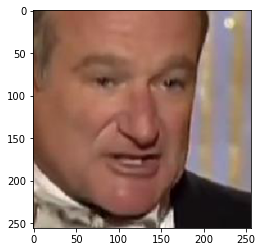

In [61]:
print(meso.predict(X))

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [62]:
## creating ROC_AUC

In [63]:
y_test = []
y_pred = []

In [64]:
for i in range(len(generator.labels)):
    X, y = generator.next()
    pred = round(meso.predict(X)[0][0])
    y_test.append(y[0])
    y_pred.append(pred) 
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

1/1 [==============================] - 0s 216ms/step
0  predictions completed.
1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 43ms/step
1000  predictions completed.
1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 47ms/step
2000  predictions completed.
1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 39ms/step
3000  predictions completed.
1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 42ms/step
4000  predictions completed.
1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step
5000  predictions completed.
1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 40ms/step
6000  predictions completed.
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 41ms/step
7000  predictions completed.
1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 43ms/step
All 7104 predictions completed


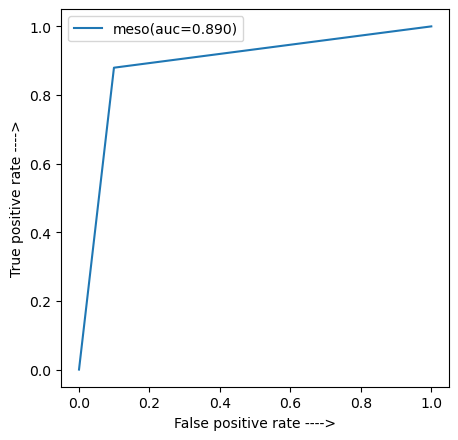

In [66]:
meso_fpr,meso_tpr,meso_threshold = roc_curve(y_test,y_pred)
auc_meso=auc(meso_fpr,meso_tpr)
plt.figure(figsize=(5,5), dpi=100)
plt.plot(meso_fpr,meso_tpr, label='meso(auc=%0.3f)'%auc_meso)
plt.xlabel('False positive rate ---->')
plt.ylabel('True positive rate ---->')
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
round_pred = [round(num) for num in y_pred]

[[2561  282]
 [ 513 3748]]


Text(33.0, 0.5, 'actual')

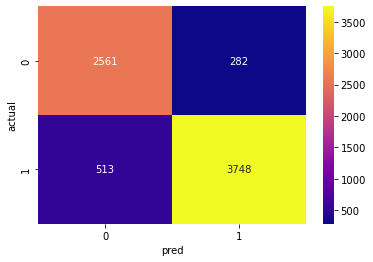

In [69]:
cm = confusion_matrix(y_test, round_pred, labels=[0, 1])
print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True,cmap='plasma',fmt='d')
plt.xlabel('pred')
plt.ylabel('actual')

In [70]:
tn, fp, fn, tp = confusion_matrix(list(y_test), list(round_pred), labels=[0, 1]).ravel()

In [71]:
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 3748
True Negative 2561
False Positive 282
False Negative 513


In [37]:
# Accuracy Score

from sklearn.metrics import accuracy_score

accuracy_score(y_test, round_pred)

0.8880912162162162

In [43]:
precision= (tp)/(tp+fp)
print(precision)

0.9302036761053154


In [44]:
recall= (tp)/(tp+fn)
print(recall)

0.8793143930500117


In [45]:
f1=2*(precision*recall)/(precision+recall)
print(f1)

0.9040434520217261


In [17]:
# Model report 

from sklearn.metrics import classification_report
print(classification_report(y_test, round_pred, labels=[0,1]))

In [15]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [23]:
# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        
    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

0  predictions completed.
1000  predictions completed.
2000  predictions completed.
3000  predictions completed.
4000  predictions completed.
5000  predictions completed.
6000  predictions completed.
7000  predictions completed.
All 7104 predictions completed


In [25]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

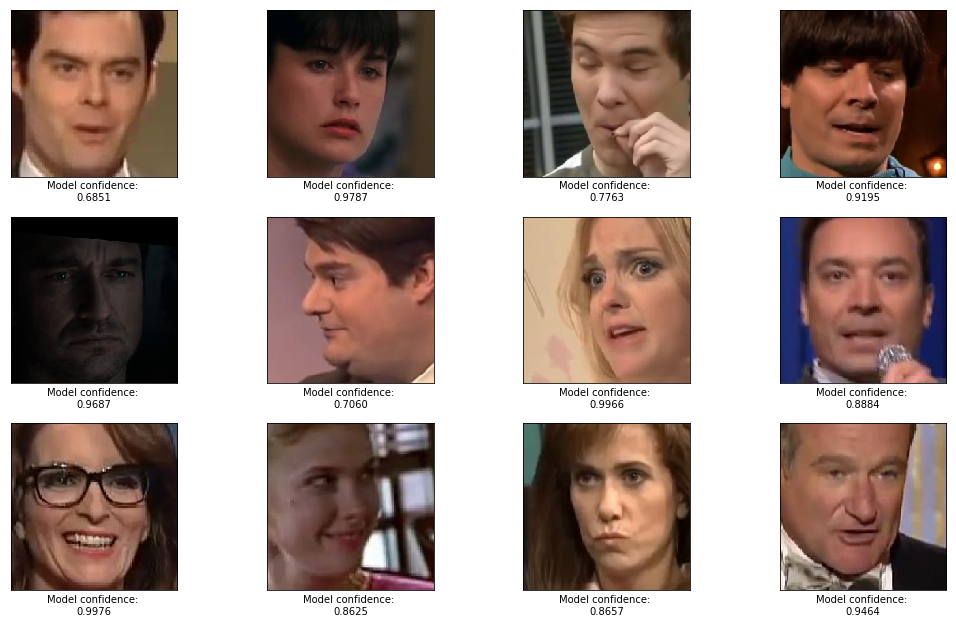

In [26]:
plotter(correct_real, correct_real_pred)

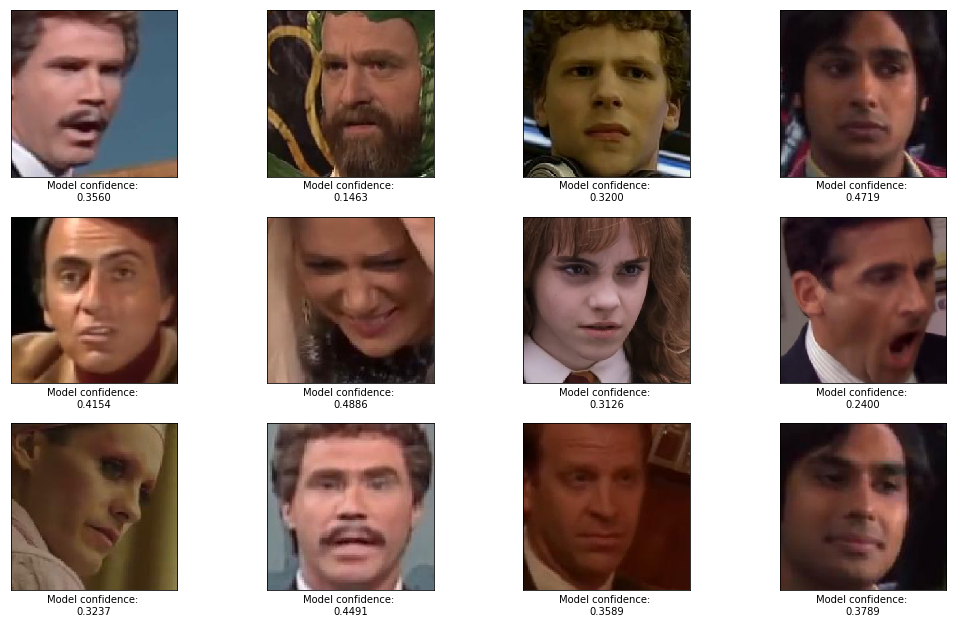

In [27]:
plotter(misclassified_real, misclassified_real_pred)

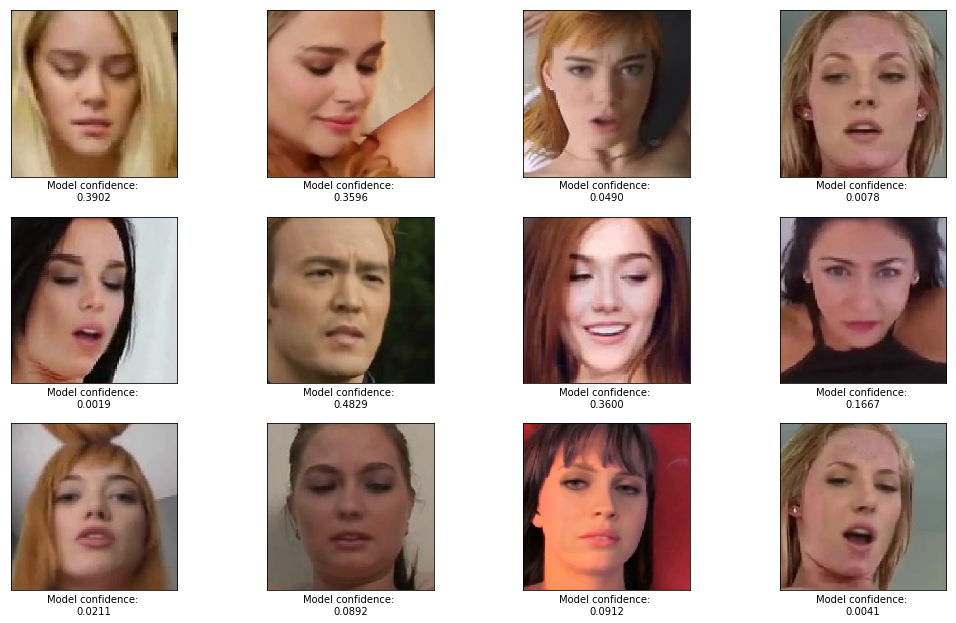

In [28]:
plotter(correct_deepfake, correct_deepfake_pred)

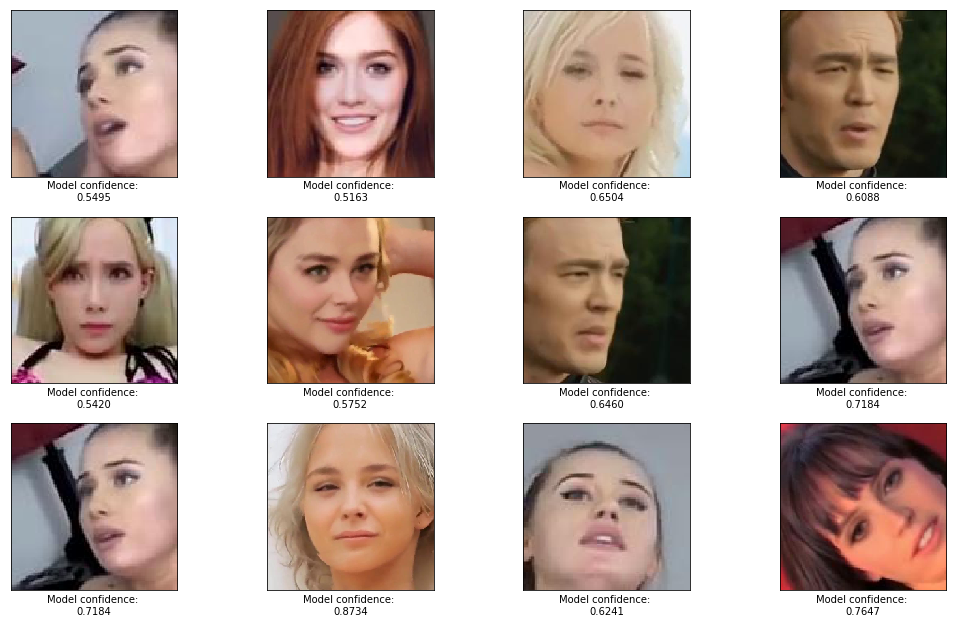

In [29]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)